In [1]:
!pip install seaborn

from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [3]:
breast_cancer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

In [4]:
path = keras.utils.get_file("breast-cancer-wisconsin.data",breast_cancer)


32768/19889 [=================================================] - 0s 0us/step


In [5]:
columns = ['sample_code', 'clump_thickness', 'cell_size_uniformity',
           'cell_shape_uniformity',
           'marginal_adhesion', 'single_epithelial_cell_size',
           'bare_nuclei', 'bland_chromatin',
           'normal_nucleoli', 'mitoses', 'class']
data = pd.read_csv(path, header=None, names=columns, na_values=[np.nan, '?'])### เนื่องจาก Meaning ของข้อมูลเป็น numerical type จึงใช้ na_value ตรวจหาและแทนทีค่าใน list ด้วย NULL เพื่อให้ dataframe เป็น numerical type ทังหมด


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sample_code                  699 non-null    int64  
 1   clump_thickness              699 non-null    int64  
 2   cell_size_uniformity         699 non-null    int64  
 3   cell_shape_uniformity        699 non-null    int64  
 4   marginal_adhesion            699 non-null    int64  
 5   single_epithelial_cell_size  699 non-null    int64  
 6   bare_nuclei                  683 non-null    float64
 7   bland_chromatin              699 non-null    int64  
 8   normal_nucleoli              699 non-null    int64  
 9   mitoses                      699 non-null    int64  
 10  class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [7]:
data.isnull().sum()

sample_code                     0
clump_thickness                 0
cell_size_uniformity            0
cell_shape_uniformity           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

In [8]:
data.shape

(699, 11)

In [9]:
data.loc[data['bare_nuclei'].isnull(),['bare_nuclei']].tail(5)

,bare_nuclei
297,NaN
315,NaN
321,NaN
411,NaN
617,NaN


In [10]:
data = data.fillna(data.median())

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sample_code,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
cell_size_uniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
cell_shape_uniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
single_epithelial_cell_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [12]:
np.random.seed(1) ###???

In [13]:
data.groupby(['class']).count()

,sample_code,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
class,,,,,,,,,,
2,458,458,458,458,458,458,458,458,458,458
4,241,241,241,241,241,241,241,241,241,241


In [14]:
data['label'] = (data['class']==4).astype(int) ### สร้าง Column ใหม่ขึ้นมาเป็น Label ให้มีค่าเป็น 0,1 ซึ่ง 1 คือ Malignant (ค่า 4 เดิม)

In [15]:
data.groupby(['class','label']).count()

,,sample_code,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
class,label,,,,,,,,,,
2,0,458,458,458,458,458,458,458,458,458,458
4,1,241,241,241,241,241,241,241,241,241,241


In [16]:
train = data.sample(frac=0.8).copy()

In [17]:
y_train = train['label']

In [18]:
y_train

584    0
417    0
606    0
349    1
134    0
      ..
137    0
536    0
212    0
673    0
651    0
Name: label, Length: 559, dtype: int64

In [19]:
train.drop(['sample_code', 'class','label'], axis=1, inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 584 to 651
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clump_thickness              559 non-null    int64  
 1   cell_size_uniformity         559 non-null    int64  
 2   cell_shape_uniformity        559 non-null    int64  
 3   marginal_adhesion            559 non-null    int64  
 4   single_epithelial_cell_size  559 non-null    int64  
 5   bare_nuclei                  559 non-null    float64
 6   bland_chromatin              559 non-null    int64  
 7   normal_nucleoli              559 non-null    int64  
 8   mitoses                      559 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 43.7 KB


In [21]:
train.shape

(559, 9)

In [22]:
test = data.drop(train.index)
y_test = test['label']
test.drop(['sample_code', 'class','label'], axis=1, inplace=True)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 7 to 691
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clump_thickness              140 non-null    int64  
 1   cell_size_uniformity         140 non-null    int64  
 2   cell_shape_uniformity        140 non-null    int64  
 3   marginal_adhesion            140 non-null    int64  
 4   single_epithelial_cell_size  140 non-null    int64  
 5   bare_nuclei                  140 non-null    float64
 6   bland_chromatin              140 non-null    int64  
 7   normal_nucleoli              140 non-null    int64  
 8   mitoses                      140 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 10.9 KB


In [24]:
test.shape

(140, 9)

In [25]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clump_thickness,559.0,4.434705,2.850947,1.0,2.0,4.0,6.0,10.0
cell_size_uniformity,559.0,3.082290,3.029193,1.0,1.0,1.0,4.0,10.0
cell_shape_uniformity,559.0,3.223614,3.003895,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,559.0,2.742397,2.818559,1.0,1.0,1.0,3.0,10.0
single_epithelial_cell_size,559.0,3.189624,2.190686,1.0,2.0,2.0,4.0,10.0
bare_nuclei,559.0,3.445438,3.603584,1.0,1.0,1.0,5.0,10.0
bland_chromatin,559.0,3.411449,2.446330,1.0,2.0,3.0,4.0,10.0
normal_nucleoli,559.0,2.844365,3.057824,1.0,1.0,1.0,3.5,10.0
mitoses,559.0,1.592129,1.742884,1.0,1.0,1.0,1.0,10.0


In [26]:
def build_model():
  model = keras.Sequential([
    layers.Dense(9, activation='sigmoid',
                 input_shape=(9,)),
    layers.Dense(9, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
   ])
  
  optimizer = keras.optimizers.Ftrl(learning_rate=0.007)
  model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
  return model

In [27]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [28]:
class PrintDot(keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs):
  if epoch % 100 == 0: print('')
  print('.', end='')


history = model.fit(train, y_train, 
          batch_size=1, 
          epochs=100, verbose=1, 
          validation_split=0.1)


Epoch 1/100
503/503 [==============================] - 2s 2ms/step - loss: 0.6472 - accuracy: 0.6561 - val_loss: 0.6212 - val_accuracy: 0.6964
Epoch 2/100
503/503 [==============================] - 1s 2ms/step - loss: 0.6436 - accuracy: 0.6561 - val_loss: 0.6183 - val_accuracy: 0.6964
Epoch 3/100
503/503 [==============================] - 1s 2ms/step - loss: 0.6412 - accuracy: 0.6561 - val_loss: 0.6147 - val_accuracy: 0.6964
Epoch 4/100
503/503 [==============================] - 1s 2ms/step - loss: 0.6379 - accuracy: 0.6561 - val_loss: 0.6108 - val_accuracy: 0.6964
Epoch 5/100
503/503 [==============================] - 1s 2ms/step - loss: 0.6342 - accuracy: 0.6561 - val_loss: 0.6067 - val_accuracy: 0.6964
Epoch 6/100
503/503 [==============================] - 1s 2ms/step - loss: 0.6304 - accuracy: 0.6561 - val_loss: 0.6026 - val_accuracy: 0.6964
Epoch 7/100
503/503 [==============================] - 1s 2ms/step - loss: 0.6264 - accuracy: 0.6561 - val_loss: 0.5983 - val_accuracy: 0.6964

In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.222096,0.964215,0.204145,0.964286,95
96,0.220277,0.966203,0.202458,0.964286,96
97,0.218493,0.964215,0.200821,0.964286,97
98,0.216745,0.964215,0.199214,0.964286,98
99,0.215032,0.964215,0.197654,0.964286,99


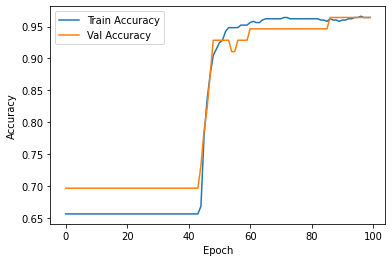

In [30]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
  plt.legend()
  plt.show()

plot_history(history)


In [31]:
# Generate generalization metrics
score = model.evaluate(test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.24109403789043427 / Test accuracy: 0.9428571462631226
